# Task 1 [10 Points]
* Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified
linear nonlinearities on the iris dataset using the keras Sequential interface . <br>
* Include code for selecting regularization strength and number of hidden units using GridSearchCV and
evaluation on an independent test-set. <br>

In [2]:
from sklearn import datasets
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import keras
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import regularizers
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

##### Loading dataset:

In [3]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

num_classes = np.unique(y).shape[0]

##### StratifiedShuffleSplit of the dataset:

In [4]:
sss = StratifiedShuffleSplit(n_splits=1, random_state=0)

for train_idx, test_idx in sss.split(X, y):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##### Model definition:

In [6]:
def make_model( num_classes=3, input_shape=4,
               optimizer="adam", hidden_size_L1=32, 
               hidden_size_L2=32, regularize=0.01):
    model = Sequential([
        Dense(hidden_size_L1,
              input_shape=(input_shape,),
              activation='relu',
              kernel_regularizer=regularizers.l2(regularize)),
        Dense(hidden_size_L2,
              activation='relu',
              kernel_regularizer=regularizers.l2(regularize)),
        Dense(num_classes,
              activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",   
                  metrics=['accuracy'])
    return model

In [7]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [10,20],
              'batch_size': [50],
              'regularize': [0.01,0.1,1],
              'hidden_size_L1':[32,64,128],
              'hidden_size_L2': [64,128,256]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

Epoch 1/10
108/108 [==============================] - 1s 6ms/step - loss: 1.6186 - acc: 0.3426
Epoch 2/10
108/108 [==============================] - 0s 111us/step - loss: 1.5266 - acc: 0.4352
Epoch 3/10
108/108 [==============================] - 0s 111us/step - loss: 1.4580 - acc: 0.6667
Epoch 4/10
108/108 [==============================] - 0s 115us/step - loss: 1.4047 - acc: 0.6852
Epoch 5/10
108/108 [==============================] - 0s 107us/step - loss: 1.3574 - acc: 0.6852
Epoch 6/10
108/108 [==============================] - 0s 104us/step - loss: 1.3194 - acc: 0.6852
Epoch 7/10
108/108 [==============================] - 0s 103us/step - loss: 1.2785 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 103us/step - loss: 1.2400 - acc: 0.6852
Epoch 9/10
108/108 [==============================] - 0s 103us/step - loss: 1.2038 - acc: 0.6852
Epoch 10/10
108/108 [==============================] - 0s 60us/step
Epoch 1/10
108/108 [==============================] - 0s 5ms/

108/108 [==============================] - 0s 115us/step - loss: 1.9641 - acc: 0.4167
Epoch 3/10
108/108 [==============================] - 0s 148us/step - loss: 1.6811 - acc: 0.5556
Epoch 4/10
108/108 [==============================] - 0s 105us/step - loss: 1.5080 - acc: 0.8333
Epoch 5/10
108/108 [==============================] - 0s 106us/step - loss: 1.4486 - acc: 0.5741
Epoch 6/10
108/108 [==============================] - 0s 107us/step - loss: 1.4235 - acc: 0.4630
Epoch 7/10
108/108 [==============================] - 0s 103us/step - loss: 1.3720 - acc: 0.5463
Epoch 8/10
108/108 [==============================] - 0s 110us/step - loss: 1.3040 - acc: 0.6667
Epoch 9/10
108/108 [==============================] - 0s 112us/step - loss: 1.2460 - acc: 0.6852
Epoch 10/10
108/108 [==============================] - 0s 54us/step
Epoch 1/10
108/108 [==============================] - 1s 8ms/step - loss: 1.8099 - acc: 0.3796
Epoch 2/10
108/108 [==============================] - 0s 110us/step - lo

Epoch 3/10
108/108 [==============================] - 0s 107us/step - loss: 1.4992 - acc: 0.6852
Epoch 4/10
108/108 [==============================] - 0s 113us/step - loss: 1.4259 - acc: 0.6852
Epoch 5/10
108/108 [==============================] - 0s 111us/step - loss: 1.3516 - acc: 0.6852
Epoch 6/10
108/108 [==============================] - 0s 110us/step - loss: 1.2822 - acc: 0.6852
Epoch 7/10
108/108 [==============================] - 0s 110us/step - loss: 1.2104 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 106us/step - loss: 1.1488 - acc: 0.6852
Epoch 9/10
108/108 [==============================] - 0s 110us/step - loss: 1.0995 - acc: 0.6852
Epoch 10/10
108/108 [==============================] - 0s 56us/step
Epoch 1/10
108/108 [==============================] - 1s 12ms/step - loss: 1.7808 - acc: 0.3148
Epoch 2/10
108/108 [==============================] - 0s 120us/step - loss: 1.6226 - acc: 0.3333
Epoch 3/10
108/108 [==============================] - 0s 117

Epoch 4/10
108/108 [==============================] - 0s 118us/step - loss: 1.6525 - acc: 0.4352
Epoch 5/10
108/108 [==============================] - 0s 121us/step - loss: 1.5716 - acc: 0.6111
Epoch 6/10
108/108 [==============================] - 0s 127us/step - loss: 1.5041 - acc: 0.6852
Epoch 7/10
108/108 [==============================] - 0s 141us/step - loss: 1.4482 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 121us/step - loss: 1.3949 - acc: 0.6852
Epoch 9/10
108/108 [==============================] - 0s 127us/step - loss: 1.3440 - acc: 0.6852
Epoch 10/10
108/108 [==============================] - 0s 61us/step
Epoch 1/10
108/108 [==============================] - 2s 16ms/step - loss: 1.6908 - acc: 0.4352
Epoch 2/10
108/108 [==============================] - 0s 113us/step - loss: 1.5891 - acc: 0.7130
Epoch 3/10
108/108 [==============================] - 0s 112us/step - loss: 1.5015 - acc: 0.8056
Epoch 4/10
108/108 [==============================] - 0s 123

Epoch 5/10
108/108 [==============================] - 0s 117us/step - loss: 1.5529 - acc: 0.6852
Epoch 6/10
108/108 [==============================] - 0s 115us/step - loss: 1.4770 - acc: 0.6852
Epoch 7/10
108/108 [==============================] - 0s 114us/step - loss: 1.4020 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 114us/step - loss: 1.3377 - acc: 0.8056
Epoch 9/10
108/108 [==============================] - 0s 118us/step - loss: 1.2829 - acc: 0.8796
Epoch 10/10
108/108 [==============================] - 0s 64us/step
Epoch 1/10
108/108 [==============================] - 2s 22ms/step - loss: 2.3386 - acc: 0.3148
Epoch 2/10
108/108 [==============================] - 0s 119us/step - loss: 1.9930 - acc: 0.3148
Epoch 3/10
108/108 [==============================] - 0s 124us/step - loss: 1.8130 - acc: 0.7963
Epoch 4/10
108/108 [==============================] - 0s 125us/step - loss: 1.7196 - acc: 0.6852
Epoch 5/10
108/108 [==============================] - 0s 137

108/108 [==============================] - 0s 81us/step
Epoch 1/10
108/108 [==============================] - 3s 25ms/step - loss: 10.3481 - acc: 0.3333
Epoch 2/10
108/108 [==============================] - 0s 141us/step - loss: 9.7918 - acc: 0.4537
Epoch 3/10
108/108 [==============================] - 0s 129us/step - loss: 9.3726 - acc: 0.6667
Epoch 4/10
108/108 [==============================] - 0s 124us/step - loss: 8.9851 - acc: 0.6667
Epoch 5/10
108/108 [==============================] - 0s 147us/step - loss: 8.5978 - acc: 0.6667
Epoch 6/10
108/108 [==============================] - 0s 145us/step - loss: 8.2232 - acc: 0.7037
Epoch 7/10
108/108 [==============================] - 0s 131us/step - loss: 7.8634 - acc: 0.8519
Epoch 8/10
108/108 [==============================] - 0s 186us/step - loss: 7.5225 - acc: 0.9537
Epoch 9/10
108/108 [==============================] - 0s 117us/step - loss: 7.1923 - acc: 0.9167
Epoch 10/10
108/108 [==============================] - 0s 96us/step
Epo

108/108 [==============================] - 3s 29ms/step - loss: 12.0259 - acc: 0.2963
Epoch 2/10
108/108 [==============================] - 0s 144us/step - loss: 11.2999 - acc: 0.3611
Epoch 3/10
108/108 [==============================] - 0s 131us/step - loss: 10.6918 - acc: 0.3611
Epoch 4/10
108/108 [==============================] - 0s 142us/step - loss: 10.0891 - acc: 0.3704
Epoch 5/10
108/108 [==============================] - 0s 131us/step - loss: 9.4946 - acc: 0.6667
Epoch 6/10
108/108 [==============================] - 0s 158us/step - loss: 8.9544 - acc: 0.6759
Epoch 7/10
108/108 [==============================] - 0s 152us/step - loss: 8.4401 - acc: 0.8241
Epoch 8/10
108/108 [==============================] - 0s 152us/step - loss: 7.9508 - acc: 0.7963
Epoch 9/10
108/108 [==============================] - 0s 136us/step - loss: 7.4972 - acc: 0.6667
Epoch 10/10
108/108 [==============================] - 0s 97us/step
Epoch 1/10
108/108 [==============================] - 3s 30ms/step 

Epoch 7/10
108/108 [==============================] - 0s 124us/step - loss: 1.3705 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 131us/step - loss: 1.3061 - acc: 0.6852
Epoch 9/10
108/108 [==============================] - 0s 121us/step - loss: 1.2475 - acc: 0.7037
Epoch 10/10
108/108 [==============================] - 0s 97us/step
Epoch 1/10
108/108 [==============================] - 3s 32ms/step - loss: 2.2762 - acc: 0.3148
Epoch 2/10
108/108 [==============================] - 0s 126us/step - loss: 1.9715 - acc: 0.3981
Epoch 3/10
108/108 [==============================] - 0s 133us/step - loss: 1.8211 - acc: 0.3611
Epoch 4/10
108/108 [==============================] - 0s 125us/step - loss: 1.7409 - acc: 0.6852
Epoch 5/10
108/108 [==============================] - 0s 126us/step - loss: 1.6583 - acc: 0.6852
Epoch 6/10
108/108 [==============================] - 0s 130us/step - loss: 1.5766 - acc: 0.6852
Epoch 7/10
108/108 [==============================] - 0s 120

108/108 [==============================] - 0s 136us/step - loss: 1.6094 - acc: 0.9167
Epoch 9/10
108/108 [==============================] - 0s 131us/step - loss: 1.5241 - acc: 0.7685
Epoch 10/10
108/108 [==============================] - 0s 90us/step
Epoch 1/10
108/108 [==============================] - 4s 37ms/step - loss: 2.9463 - acc: 0.3333
Epoch 2/10
108/108 [==============================] - 0s 138us/step - loss: 2.4423 - acc: 0.5000
Epoch 3/10
108/108 [==============================] - 0s 147us/step - loss: 2.2367 - acc: 0.6296
Epoch 4/10
108/108 [==============================] - 0s 161us/step - loss: 2.1866 - acc: 0.3519
Epoch 5/10
108/108 [==============================] - 0s 149us/step - loss: 2.0503 - acc: 0.5093
Epoch 6/10
108/108 [==============================] - 0s 147us/step - loss: 1.8814 - acc: 0.8426
Epoch 7/10
108/108 [==============================] - 0s 136us/step - loss: 1.7777 - acc: 0.6852
Epoch 8/10
108/108 [==============================] - 0s 148us/step - l

108/108 [==============================] - 0s 128us/step - loss: 1.7457 - acc: 0.7407
Epoch 9/10
108/108 [==============================] - 0s 129us/step - loss: 1.6418 - acc: 0.9074
Epoch 10/10
108/108 [==============================] - 0s 95us/step
Epoch 1/10
108/108 [==============================] - 5s 43ms/step - loss: 2.8897 - acc: 0.3148
Epoch 2/10
108/108 [==============================] - 0s 160us/step - loss: 2.5851 - acc: 0.6852
Epoch 3/10
108/108 [==============================] - 0s 147us/step - loss: 2.3885 - acc: 0.6852
Epoch 4/10
108/108 [==============================] - 0s 142us/step - loss: 2.2063 - acc: 0.7685
Epoch 5/10
108/108 [==============================] - 0s 132us/step - loss: 2.0619 - acc: 0.7037
Epoch 6/10
108/108 [==============================] - 0s 129us/step - loss: 1.9375 - acc: 0.7500
Epoch 7/10
108/108 [==============================] - 0s 134us/step - loss: 1.8363 - acc: 0.9259
Epoch 8/10
108/108 [==============================] - 0s 129us/step - l

108/108 [==============================] - 0s 144us/step - loss: 16.7316 - acc: 0.3333
Epoch 4/10
108/108 [==============================] - 0s 155us/step - loss: 15.6464 - acc: 0.6111
Epoch 5/10
108/108 [==============================] - 0s 144us/step - loss: 14.6370 - acc: 0.6667
Epoch 6/10
108/108 [==============================] - 0s 165us/step - loss: 13.7056 - acc: 0.6667
Epoch 7/10
108/108 [==============================] - 0s 186us/step - loss: 12.7820 - acc: 0.6667
Epoch 8/10
108/108 [==============================] - 0s 153us/step - loss: 11.9235 - acc: 0.7037
Epoch 9/10
108/108 [==============================] - 0s 157us/step - loss: 11.1193 - acc: 0.6852
Epoch 10/10
108/108 [==============================] - 0s 111us/step
Epoch 1/10
108/108 [==============================] - 5s 46ms/step - loss: 18.7223 - acc: 0.3056
Epoch 2/10
108/108 [==============================] - 0s 138us/step - loss: 17.6319 - acc: 0.3333
Epoch 3/10
108/108 [==============================] - 0s 143u

108/108 [==============================] - 0s 166us/step - loss: 1.2566 - acc: 0.6852
Epoch 8/20
108/108 [==============================] - 0s 153us/step - loss: 1.2132 - acc: 0.6852
Epoch 9/20
108/108 [==============================] - 0s 151us/step - loss: 1.1716 - acc: 0.7130
Epoch 10/20
108/108 [==============================] - 0s 172us/step - loss: 1.1303 - acc: 0.8981
Epoch 11/20
108/108 [==============================] - 0s 193us/step - loss: 1.0920 - acc: 0.8333
Epoch 12/20
108/108 [==============================] - 0s 184us/step - loss: 1.0558 - acc: 0.6667
Epoch 13/20
108/108 [==============================] - 0s 162us/step - loss: 1.0245 - acc: 0.6667
Epoch 14/20
108/108 [==============================] - 0s 175us/step - loss: 0.9986 - acc: 0.6667
Epoch 15/20
108/108 [==============================] - 0s 150us/step - loss: 0.9714 - acc: 0.6667
Epoch 16/20
108/108 [==============================] - 0s 145us/step - loss: 0.9428 - acc: 0.6667
Epoch 17/20
108/108 [=============

108/108 [==============================] - 0s 139us/step - loss: 46.5199 - acc: 0.3148
Epoch 6/20
108/108 [==============================] - 0s 139us/step - loss: 44.8981 - acc: 0.3148
Epoch 7/20
108/108 [==============================] - 0s 141us/step - loss: 43.3388 - acc: 0.3148
Epoch 8/20
108/108 [==============================] - 0s 153us/step - loss: 41.8411 - acc: 0.3148
Epoch 9/20
108/108 [==============================] - 0s 160us/step - loss: 40.3977 - acc: 0.3148
Epoch 10/20
108/108 [==============================] - 0s 155us/step - loss: 39.0058 - acc: 0.3148
Epoch 11/20
108/108 [==============================] - 0s 144us/step - loss: 37.6628 - acc: 0.3148
Epoch 12/20
108/108 [==============================] - 0s 145us/step - loss: 36.3695 - acc: 0.3148
Epoch 13/20
108/108 [==============================] - 0s 146us/step - loss: 35.1189 - acc: 0.3148
Epoch 14/20
108/108 [==============================] - 0s 153us/step - loss: 33.9134 - acc: 0.3148
Epoch 15/20
108/108 [=====

108/108 [==============================] - 0s 170us/step - loss: 1.4630 - acc: 0.6852
Epoch 5/20
108/108 [==============================] - 0s 190us/step - loss: 1.3994 - acc: 0.6852
Epoch 6/20
108/108 [==============================] - 0s 145us/step - loss: 1.3416 - acc: 0.6852
Epoch 7/20
108/108 [==============================] - 0s 152us/step - loss: 1.2878 - acc: 0.6852
Epoch 8/20
108/108 [==============================] - 0s 197us/step - loss: 1.2349 - acc: 0.6852
Epoch 9/20
108/108 [==============================] - 0s 153us/step - loss: 1.1829 - acc: 0.6852
Epoch 10/20
108/108 [==============================] - 0s 146us/step - loss: 1.1351 - acc: 0.6944
Epoch 11/20
108/108 [==============================] - 0s 142us/step - loss: 1.0919 - acc: 0.7315
Epoch 12/20
108/108 [==============================] - 0s 170us/step - loss: 1.0497 - acc: 0.7130
Epoch 13/20
108/108 [==============================] - 0s 141us/step - loss: 1.0099 - acc: 0.6852
Epoch 14/20
108/108 [================

108/108 [==============================] - 0s 168us/step - loss: 6.5499 - acc: 0.3333
Epoch 3/20
108/108 [==============================] - 0s 159us/step - loss: 6.3171 - acc: 0.5185
Epoch 4/20
108/108 [==============================] - 0s 157us/step - loss: 6.0862 - acc: 0.6852
Epoch 5/20
108/108 [==============================] - 0s 150us/step - loss: 5.8568 - acc: 0.7222
Epoch 6/20
108/108 [==============================] - 0s 146us/step - loss: 5.6399 - acc: 0.6667
Epoch 7/20
108/108 [==============================] - 0s 149us/step - loss: 5.4343 - acc: 0.6667
Epoch 8/20
108/108 [==============================] - 0s 175us/step - loss: 5.2335 - acc: 0.6667
Epoch 9/20
108/108 [==============================] - 0s 148us/step - loss: 5.0366 - acc: 0.6667
Epoch 10/20
108/108 [==============================] - 0s 147us/step - loss: 4.8471 - acc: 0.6667
Epoch 11/20
108/108 [==============================] - 0s 146us/step - loss: 4.6667 - acc: 0.6667
Epoch 12/20
108/108 [==================

108/108 [==============================] - 0s 111us/step
Epoch 1/20
108/108 [==============================] - 7s 60ms/step - loss: 1.8628 - acc: 0.3056
Epoch 2/20
108/108 [==============================] - 0s 158us/step - loss: 1.6979 - acc: 0.3889
Epoch 3/20
108/108 [==============================] - 0s 158us/step - loss: 1.5710 - acc: 0.6852
Epoch 4/20
108/108 [==============================] - 0s 145us/step - loss: 1.4497 - acc: 0.6852
Epoch 5/20
108/108 [==============================] - 0s 152us/step - loss: 1.3441 - acc: 0.8796
Epoch 6/20
108/108 [==============================] - 0s 165us/step - loss: 1.2647 - acc: 0.7500
Epoch 7/20
108/108 [==============================] - 0s 187us/step - loss: 1.1916 - acc: 0.7315
Epoch 8/20
108/108 [==============================] - 0s 181us/step - loss: 1.1345 - acc: 0.6574
Epoch 9/20
108/108 [==============================] - 0s 193us/step - loss: 1.0738 - acc: 0.8519
Epoch 10/20
108/108 [==============================] - 0s 198us/step - 

108/108 [==============================] - 0s 169us/step - loss: 3.0942 - acc: 0.9352
Epoch 19/20
108/108 [==============================] - 0s 168us/step - loss: 2.9510 - acc: 0.9352
Epoch 20/20
108/108 [==============================] - 0s 128us/step
Epoch 1/20
108/108 [==============================] - 7s 64ms/step - loss: 63.7963 - acc: 0.3426
Epoch 2/20
108/108 [==============================] - 0s 146us/step - loss: 60.5970 - acc: 0.3426
Epoch 3/20
108/108 [==============================] - 0s 144us/step - loss: 57.2454 - acc: 0.3426
Epoch 4/20
108/108 [==============================] - 0s 145us/step - loss: 53.9717 - acc: 0.5648
Epoch 5/20
108/108 [==============================] - 0s 146us/step - loss: 50.8251 - acc: 0.6111
Epoch 6/20
108/108 [==============================] - 0s 145us/step - loss: 47.8171 - acc: 0.6296
Epoch 7/20
108/108 [==============================] - 0s 145us/step - loss: 44.9514 - acc: 0.6852
Epoch 8/20
108/108 [==============================] - 0s 137us

108/108 [==============================] - 0s 158us/step - loss: 1.0669 - acc: 0.9074
Epoch 16/20
108/108 [==============================] - 0s 150us/step - loss: 1.0356 - acc: 0.8981
Epoch 17/20
108/108 [==============================] - 0s 198us/step - loss: 1.0068 - acc: 0.9259
Epoch 18/20
108/108 [==============================] - 0s 154us/step - loss: 0.9811 - acc: 0.9444
Epoch 19/20
108/108 [==============================] - 0s 165us/step - loss: 0.9566 - acc: 0.9630
Epoch 20/20
108/108 [==============================] - 0s 180us/step
Epoch 1/20
108/108 [==============================] - 8s 74ms/step - loss: 1.8101 - acc: 0.3796
Epoch 2/20
108/108 [==============================] - 0s 203us/step - loss: 1.7059 - acc: 0.3611
Epoch 3/20
108/108 [==============================] - 0s 216us/step - loss: 1.6209 - acc: 0.3611
Epoch 4/20
108/108 [==============================] - 0s 188us/step - loss: 1.5367 - acc: 0.6574
Epoch 5/20
108/108 [==============================] - 0s 192us/ste

108/108 [==============================] - 0s 173us/step - loss: 43.7283 - acc: 0.5648
Epoch 14/20
108/108 [==============================] - 0s 183us/step - loss: 41.8504 - acc: 0.6204
Epoch 15/20
108/108 [==============================] - 0s 218us/step - loss: 40.0473 - acc: 0.6667
Epoch 16/20
108/108 [==============================] - 0s 193us/step - loss: 38.3176 - acc: 0.6759
Epoch 17/20
108/108 [==============================] - 0s 190us/step - loss: 36.6613 - acc: 0.6852
Epoch 18/20
108/108 [==============================] - 0s 169us/step - loss: 35.0725 - acc: 0.6852
Epoch 19/20
108/108 [==============================] - 0s 164us/step - loss: 33.5496 - acc: 0.6852
Epoch 20/20
108/108 [==============================] - 0s 157us/step
Epoch 1/20
108/108 [==============================] - 8s 72ms/step - loss: 72.7963 - acc: 0.3519
Epoch 2/20
108/108 [==============================] - 0s 200us/step - loss: 70.1772 - acc: 0.3519
Epoch 3/20
108/108 [==============================] - 0

108/108 [==============================] - 0s 161us/step - loss: 1.2667 - acc: 0.9630
Epoch 11/20
108/108 [==============================] - 0s 164us/step - loss: 1.2147 - acc: 0.9630
Epoch 12/20
108/108 [==============================] - 0s 175us/step - loss: 1.1675 - acc: 0.8333
Epoch 13/20
108/108 [==============================] - 0s 205us/step - loss: 1.1321 - acc: 0.7593
Epoch 14/20
108/108 [==============================] - 0s 154us/step - loss: 1.0918 - acc: 0.7870
Epoch 15/20
108/108 [==============================] - 0s 154us/step - loss: 1.0528 - acc: 0.8704
Epoch 16/20
108/108 [==============================] - 0s 164us/step - loss: 1.0193 - acc: 0.8796
Epoch 17/20
108/108 [==============================] - 0s 239us/step - loss: 0.9905 - acc: 0.8796
Epoch 18/20
108/108 [==============================] - 0s 177us/step - loss: 0.9623 - acc: 0.9259
Epoch 19/20
108/108 [==============================] - 0s 204us/step - loss: 0.9340 - acc: 0.9352
Epoch 20/20
108/108 [===========

108/108 [==============================] - 0s 176us/step - loss: 67.0932 - acc: 0.6852
Epoch 9/20
108/108 [==============================] - 0s 164us/step - loss: 63.6398 - acc: 0.6852
Epoch 10/20
108/108 [==============================] - 0s 157us/step - loss: 60.3431 - acc: 0.6852
Epoch 11/20
108/108 [==============================] - 0s 152us/step - loss: 57.2020 - acc: 0.6852
Epoch 12/20
108/108 [==============================] - 0s 179us/step - loss: 54.2121 - acc: 0.6852
Epoch 13/20
108/108 [==============================] - 0s 171us/step - loss: 51.3698 - acc: 0.6944
Epoch 14/20
108/108 [==============================] - 0s 161us/step - loss: 48.6679 - acc: 0.7130
Epoch 15/20
108/108 [==============================] - 0s 186us/step - loss: 46.1012 - acc: 0.7407
Epoch 16/20
108/108 [==============================] - 0s 157us/step - loss: 43.6587 - acc: 0.7037
Epoch 17/20
108/108 [==============================] - 0s 163us/step - loss: 41.3374 - acc: 0.6852
Epoch 18/20
108/108 [==

108/108 [==============================] - 0s 175us/step - loss: 1.5897 - acc: 0.7870
Epoch 6/20
108/108 [==============================] - 0s 218us/step - loss: 1.4863 - acc: 0.8981
Epoch 7/20
108/108 [==============================] - 0s 175us/step - loss: 1.4094 - acc: 0.8889
Epoch 8/20
108/108 [==============================] - 0s 166us/step - loss: 1.3430 - acc: 0.7963
Epoch 9/20
108/108 [==============================] - 0s 175us/step - loss: 1.2639 - acc: 0.9444
Epoch 10/20
108/108 [==============================] - 0s 164us/step - loss: 1.2084 - acc: 0.8241
Epoch 11/20
108/108 [==============================] - 0s 155us/step - loss: 1.1601 - acc: 0.7685
Epoch 12/20
108/108 [==============================] - 0s 159us/step - loss: 1.0962 - acc: 0.9352
Epoch 13/20
108/108 [==============================] - 0s 162us/step - loss: 1.0757 - acc: 0.8333
Epoch 14/20
108/108 [==============================] - 0s 193us/step - loss: 1.0320 - acc: 0.8796
Epoch 15/20
108/108 [===============

Epoch 3/20
108/108 [==============================] - 0s 163us/step - loss: 98.2763 - acc: 0.6667
Epoch 4/20
108/108 [==============================] - 0s 161us/step - loss: 92.1591 - acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 158us/step - loss: 86.2831 - acc: 0.6852
Epoch 6/20
108/108 [==============================] - 0s 156us/step - loss: 80.6804 - acc: 0.6852
Epoch 7/20
108/108 [==============================] - 0s 154us/step - loss: 75.3649 - acc: 0.7593
Epoch 8/20
108/108 [==============================] - 0s 159us/step - loss: 70.3463 - acc: 0.9815
Epoch 9/20
108/108 [==============================] - 0s 163us/step - loss: 65.6248 - acc: 0.8056
Epoch 10/20
108/108 [==============================] - 0s 156us/step - loss: 61.1869 - acc: 0.6296
Epoch 11/20
108/108 [==============================] - 0s 183us/step - loss: 57.0162 - acc: 0.6759
Epoch 12/20
108/108 [==============================] - 0s 162us/step - loss: 53.1087 - acc: 0.8704
Epoch 13/20
108/1

108/108 [==============================] - 0s 184us/step
Epoch 1/20
108/108 [==============================] - 10s 93ms/step - loss: 10.4318 - acc: 0.1759
Epoch 2/20
108/108 [==============================] - 0s 225us/step - loss: 9.9658 - acc: 0.4259
Epoch 3/20
108/108 [==============================] - 0s 181us/step - loss: 9.5576 - acc: 0.3148
Epoch 4/20
108/108 [==============================] - 0s 172us/step - loss: 9.1221 - acc: 0.4630
Epoch 5/20
108/108 [==============================] - 0s 161us/step - loss: 8.6847 - acc: 0.7685
Epoch 6/20
108/108 [==============================] - 0s 164us/step - loss: 8.2825 - acc: 0.6852
Epoch 7/20
108/108 [==============================] - 0s 179us/step - loss: 7.9131 - acc: 0.6852
Epoch 8/20
108/108 [==============================] - 0s 167us/step - loss: 7.5704 - acc: 0.6852
Epoch 9/20
108/108 [==============================] - 0s 164us/step - loss: 7.2253 - acc: 0.6852
Epoch 10/20
108/108 [==============================] - 0s 177us/step 

108/108 [==============================] - 0s 170us/step - loss: 37.1725 - acc: 0.8704
Epoch 19/20
108/108 [==============================] - 0s 173us/step - loss: 35.1043 - acc: 0.8981
Epoch 20/20
108/108 [==============================] - 0s 190us/step
Epoch 1/20
108/108 [==============================] - 11s 98ms/step - loss: 95.5692 - acc: 0.3056
Epoch 2/20
108/108 [==============================] - 0s 196us/step - loss: 91.4042 - acc: 0.3519
Epoch 3/20
108/108 [==============================] - 0s 169us/step - loss: 87.0334 - acc: 0.6667
Epoch 4/20
108/108 [==============================] - 0s 210us/step - loss: 82.7434 - acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 160us/step - loss: 78.5905 - acc: 0.6667
Epoch 6/20
108/108 [==============================] - 0s 160us/step - loss: 74.5857 - acc: 0.6667
Epoch 7/20
108/108 [==============================] - 0s 163us/step - loss: 70.7462 - acc: 0.6667
Epoch 8/20
108/108 [==============================] - 0s 16

108/108 [==============================] - 0s 165us/step - loss: 1.1908 - acc: 0.8981
Epoch 18/20
108/108 [==============================] - 0s 167us/step - loss: 1.1472 - acc: 0.7130
Epoch 19/20
108/108 [==============================] - 0s 162us/step - loss: 1.1181 - acc: 0.7037
Epoch 20/20
108/108 [==============================] - 0s 190us/step
Epoch 1/20
108/108 [==============================] - 11s 102ms/step - loss: 2.4390 - acc: 0.3704
Epoch 2/20
108/108 [==============================] - 0s 177us/step - loss: 2.2242 - acc: 0.3426
Epoch 3/20
108/108 [==============================] - 0s 189us/step - loss: 2.0790 - acc: 0.6296
Epoch 4/20
108/108 [==============================] - 0s 212us/step - loss: 1.9307 - acc: 0.8056
Epoch 5/20
108/108 [==============================] - 0s 174us/step - loss: 1.8699 - acc: 0.6852
Epoch 6/20
108/108 [==============================] - 0s 202us/step - loss: 1.7540 - acc: 0.6852
Epoch 7/20
108/108 [==============================] - 0s 177us/ste

108/108 [==============================] - 0s 165us/step - loss: 6.6281 - acc: 0.8981
Epoch 16/20
108/108 [==============================] - 0s 206us/step - loss: 6.2661 - acc: 0.7222
Epoch 17/20
108/108 [==============================] - 0s 189us/step - loss: 5.9223 - acc: 0.6852
Epoch 18/20
108/108 [==============================] - 0s 172us/step - loss: 5.5912 - acc: 0.6944
Epoch 19/20
108/108 [==============================] - 0s 166us/step - loss: 5.2766 - acc: 0.8889
Epoch 20/20
108/108 [==============================] - 0s 192us/step
Epoch 1/20
108/108 [==============================] - 11s 100ms/step - loss: 134.9407 - acc: 0.3426
Epoch 2/20
108/108 [==============================] - 0s 215us/step - loss: 128.1360 - acc: 0.3426
Epoch 3/20
108/108 [==============================] - 0s 218us/step - loss: 121.0065 - acc: 0.3426
Epoch 4/20
108/108 [==============================] - 0s 199us/step - loss: 114.0374 - acc: 0.5278
Epoch 5/20
108/108 [==============================] - 0s

108/108 [==============================] - 0s 202us/step - loss: 1.4783 - acc: 0.8704
Epoch 13/20
108/108 [==============================] - 0s 172us/step - loss: 1.4168 - acc: 0.8056
Epoch 14/20
108/108 [==============================] - 0s 178us/step - loss: 1.3395 - acc: 0.9537
Epoch 15/20
108/108 [==============================] - 0s 205us/step - loss: 1.2879 - acc: 0.9352
Epoch 16/20
108/108 [==============================] - 0s 184us/step - loss: 1.2268 - acc: 0.9630
Epoch 17/20
108/108 [==============================] - 0s 170us/step - loss: 1.1737 - acc: 0.9537
Epoch 18/20
108/108 [==============================] - 0s 172us/step - loss: 1.1229 - acc: 0.9722
Epoch 19/20
108/108 [==============================] - 0s 183us/step - loss: 1.0814 - acc: 0.9815
Epoch 20/20
108/108 [==============================] - 0s 188us/step
Epoch 1/20
108/108 [==============================] - 11s 103ms/step - loss: 3.0273 - acc: 0.3148
Epoch 2/20
108/108 [==============================] - 0s 196u

108/108 [==============================] - 0s 178us/step - loss: 90.9107 - acc: 0.6852
Epoch 11/20
108/108 [==============================] - 0s 172us/step - loss: 83.7945 - acc: 0.6852
Epoch 12/20
108/108 [==============================] - 0s 211us/step - loss: 77.1798 - acc: 0.6852
Epoch 13/20
108/108 [==============================] - 0s 196us/step - loss: 71.0407 - acc: 0.6852
Epoch 14/20
108/108 [==============================] - 0s 178us/step - loss: 65.3520 - acc: 0.6852
Epoch 15/20
108/108 [==============================] - 0s 168us/step - loss: 60.0858 - acc: 0.7037
Epoch 16/20
108/108 [==============================] - 0s 174us/step - loss: 55.2148 - acc: 0.7963
Epoch 17/20
108/108 [==============================] - 0s 179us/step - loss: 50.7110 - acc: 0.8056
Epoch 18/20
108/108 [==============================] - 0s 173us/step - loss: 46.5533 - acc: 0.7315
Epoch 19/20
108/108 [==============================] - 0s 236us/step - loss: 42.7176 - acc: 0.7222
Epoch 20/20
108/108 [=

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f462814e400>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [10, 20], 'batch_size': [50], 'regularize': [0.01, 0.1, 1], 'hidden_size_L1': [32, 64, 128], 'hidden_size_L2': [64, 128, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

##### Best model Parameters as per the grid serach:

In [8]:
grid.best_params_

{'batch_size': 50,
 'epochs': 20,
 'hidden_size_L1': 128,
 'hidden_size_L2': 256,
 'regularize': 0.01}

##### Best Model performance on validation set:

In [9]:
print("best validation score is {} ".format(grid.best_score_))

best validation score is 0.9481481552124024 


##### Model performance on Test data:

In [15]:
pred = grid.best_estimator_.predict(X_test)
test_accu = np.sum(pred == np.argmax(y_test, axis=1))/pred.shape[0]
print("Test score is {} ".format(test_accu))

Test score is 1.0 


# Task 2 [30 Points]
* Train a multilayer perceptron on the MNIST dataset using the traditional train/test split as given
by mnist.load_data in keras. <br>
* Use a separate 10000 samples (from the training set) for model
selection and to compute learning curves (accuracy vs epochs, not vs n_samples). <br>
* Compare a “vanilla” model with a model using drop-out. Visualize learning curves for all models. As an
estimate, you should expect each model to take less than 30 minutes to train on a CPU.

In [3]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

##### Preparing data:

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##### Separating a random sample of 10000 as validation set:

In [5]:
idx = np.arange(X_train.shape[0])
np.random.seed(seed=0)
np.random.shuffle(idx)
train_idx = idx[:50000]
val_idx = idx[-10000:]
X_train_new = X_train[train_idx,:]
y_train_new = y_train[train_idx,:]
X_val = X_train[val_idx,:]
y_val = y_train[val_idx,:]

## Vanilla Model:

In [6]:
hidden_size_L1 = 50
hidden_size_L2 = 100
hidden_size_L3 = 200
# hidden_size_L4 = 100
hidden_size_L4 = 32
hidden_size_L5 = 32


mnist_model = Sequential([
        Dense(hidden_size_L1, input_shape=(X_train.shape[1],)),
        Activation('relu'),
        Dense(hidden_size_L2),
        Activation('relu'),
        Dense(hidden_size_L3),
        Activation('relu'),
        Dense(hidden_size_L4),
        Activation('relu'),
#         Dense(hidden_size_L5),
#         Activation('relu'),
        Dense(10),
        Activation('softmax')
    ])

mnist_model.compile("adam","categorical_crossentropy",metrics=["accuracy"])

In [7]:
mnist_model_obj = mnist_model.fit(X_train_new,
                                  y_train_new,
                                  batch_size=128,
                                  verbose=1,epochs=30,
                                  validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 59us/step - loss: 0.4198 - acc: 0.8751 - val_loss: 0.2109 - val_acc: 0.9362
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.1637 - acc: 0.9507 - val_loss: 0.1472 - val_acc: 0.9545
Epoch 3/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.1222 - acc: 0.9624 - val_loss: 0.1235 - val_acc: 0.9614
Epoch 4/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0989 - acc: 0.9708 - val_loss: 0.1112 - val_acc: 0.9685
Epoch 5/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0818 - acc: 0.9746 - val_loss: 0.1036 - val_acc: 0.9702
Epoch 6/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0707 - acc: 0.9783 - val_loss: 0.1039 - val_acc: 0.9698
Epoch 7/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0608 - acc: 0.9808 - val_loss: 0.1121 - val_acc

In [8]:
print("Vanilla Model Test Accuracy: \n")
mnist_model.evaluate(X_test, y_test)

Vanilla Model Test Accuracy: 

10000/10000 [==============================] - 0s 45us/step


[0.1565230111772601, 0.9713]

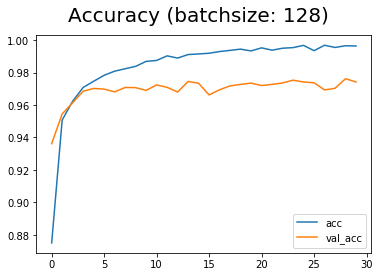

In [9]:
pd.DataFrame(mnist_model_obj.history)[['acc','val_acc']].plot()
plt.suptitle("Accuracy (batchsize: 128)",fontsize = 20)
plt.show()

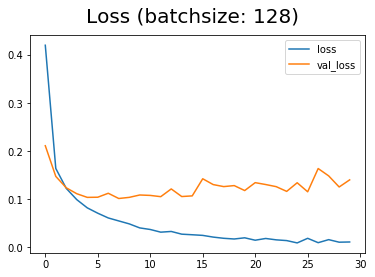

In [10]:
#batch-size=128
pd.DataFrame(mnist_model_obj.history)[['loss','val_loss']].plot()
plt.suptitle("Loss (batchsize: 128)",fontsize = 20)
plt.show()

## Dropout model:

In [11]:
dropout_L1 = 0.2
dropout_L2 = 0.2
dropout_L3 = 0.2
dropout_L4 = 0.2

In [12]:
mnist_model_dropout = Sequential([
        Dense(hidden_size_L1, input_shape=(X_train.shape[1],)),
        Activation('relu'),
        Dropout(dropout_L1),
        Dense(hidden_size_L2),
        Activation('relu'),
        Dropout(dropout_L2),
        Dense(hidden_size_L3),
        Activation('relu'),
        Dropout(dropout_L3),
        Dense(hidden_size_L4),
        Activation('relu'),
        Dropout(dropout_L4),
        Dense(10),
        Activation('softmax')
    ])
mnist_model_dropout.compile("adam","categorical_crossentropy",
                            metrics=["accuracy"])

In [13]:
mnist_model_dropout_obj = mnist_model_dropout.fit(X_train_new,
                                                  y_train_new,
                                                  batch_size=128,
                                                  verbose=1,
                                                  epochs=30,
                                                  validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 68us/step - loss: 0.6908 - acc: 0.7795 - val_loss: 0.2465 - val_acc: 0.9225
Epoch 2/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.3137 - acc: 0.9111 - val_loss: 0.1854 - val_acc: 0.9475
Epoch 3/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.2560 - acc: 0.9271 - val_loss: 0.1595 - val_acc: 0.9541
Epoch 4/30
50000/50000 [==============================] - 2s 47us/step - loss: 0.2213 - acc: 0.9391 - val_loss: 0.1433 - val_acc: 0.9582
Epoch 5/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.2052 - acc: 0.9427 - val_loss: 0.1397 - val_acc: 0.9597
Epoch 6/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.1893 - acc: 0.9473 - val_loss: 0.1263 - val_acc: 0.9649
Epoch 7/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.1753 - acc: 0.9506 - val_loss: 0.1231 - val_acc

In [14]:
print("Dropout Model Test Accuracy: \n")
mnist_model_dropout.evaluate(X_test, y_test)

Dropout Model Test Accuracy: 

10000/10000 [==============================] - 0s 49us/step


[0.10580891984964255, 0.9731]

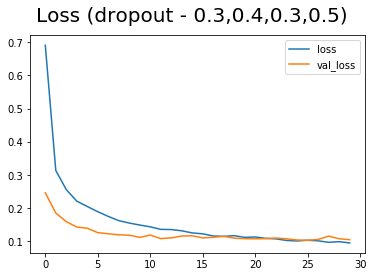

In [15]:
pd.DataFrame(mnist_model_dropout_obj.history)[['loss','val_loss']].plot()
plt.suptitle("Loss (dropout - 0.3,0.4,0.3,0.5)",fontsize = 20)
plt.show()

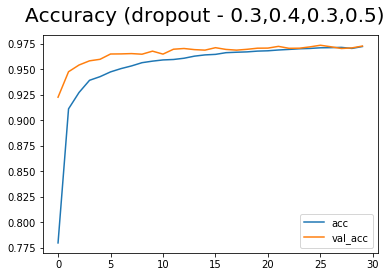

In [16]:
pd.DataFrame(mnist_model_dropout_obj.history)[['acc','val_acc']].plot()
plt.suptitle("Accuracy (dropout - 0.3,0.4,0.3,0.5)",fontsize = 20)
plt.show()

## Model Comparison:

* The accuracy **without dropout** is : **0.9713**
* The accuracy **with dropout** is : **0.9731**

* We see a clear gap between validation and train accuracy in the plots of the vanilla model which indicates that there is overfitting. Therefore, using dropout could improve generalization accuracy

* We applied dropout to the model and saw that the two curves converged to a nearly equal accuracy which represents that now the model is more generalizable.

# Task 3 [30 Points]
* Train a convolutional neural network on the SVHN dataset in format 2 (single digit
classification). You should achieve at least 85% test-set accuracy with a base model.<br>
* Also build a model using batch normalization. Your final accuracy will be included in the grading. <br>
* You can compare against other approaches reported here if you’re curious. You shouldn’t use
the “extra” data. On a CPU, each epoch (pass through the training set) can take up to ~40
minutes.
* **Hint** : Make sure you are doing the reshape for the training set correctly. A direct reshape might
give you garbled images. Display an image after reshaping to make sure they are correct.

In [3]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

##### data import:

In [4]:
test_data = scipy.io.loadmat('test_32x32.mat')
train_data = scipy.io.loadmat('train_32x32.mat')

##### data pre-processing:

In [32]:
X_train = train_data['X'].T
X_test = test_data['X'].T
y_train = train_data['y']
y_test = test_data['y']

X_train = X_train/255
X_test = X_test/255
y_test[y_test == 10] = 0
y_train[y_train == 10] = 0
num_classes = 10

In [33]:
input_shape = train_data['X'].shape[:3]

X_train = X_train.reshape(X_train.shape[0], input_shape[0],
                          input_shape[1], input_shape[2])
X_test = X_test.reshape(X_test.shape[0], input_shape[0],
                        input_shape[1], input_shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Base model (Without Batch Normalization):

##### Model Building:

In [34]:
conv_l1 = 48
conv_l2 = 64
conv_l3 = 128
conv_l4 = 160
dense_l1 = 1024
dense_l2 = 512
dropout = 0.2

In [35]:
model = Sequential()
model.add(Conv2D(conv_l1, kernel_size=(3,3),
                 input_shape = input_shape,
                 activation="relu",padding='same'))
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(conv_l2, kernel_size=(3,3),
                 activation="relu",padding='same'))
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(conv_l3, kernel_size=(3,3),
                 activation="relu",padding='same'))
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(conv_l4, kernel_size=(3,3),
#                  activation="relu",padding='same'))
# model.add(Dropout(dropout))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(dense_l1, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(dense_l2, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile("adam", "categorical_crossentropy",
              metrics=["accuracy"])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        27712     
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [37]:
model_hist = model.fit(X_train,
                       y_train,
                       batch_size=256,
                       epochs=20,
                       verbose=1,
                       validation_split = .1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 15s 233us/step - loss: 1.8961 - acc: 0.3182 - val_loss: 1.4015 - val_acc: 0.5239
Epoch 2/20
65931/65931 [==============================] - 14s 208us/step - loss: 1.0179 - acc: 0.6584 - val_loss: 0.7820 - val_acc: 0.7630
Epoch 3/20
65931/65931 [==============================] - 14s 208us/step - loss: 0.6874 - acc: 0.7752 - val_loss: 0.5710 - val_acc: 0.8172
Epoch 4/20
65931/65931 [==============================] - 14s 209us/step - loss: 0.5728 - acc: 0.8154 - val_loss: 0.4843 - val_acc: 0.8436
Epoch 5/20
65931/65931 [==============================] - 14s 208us/step - loss: 0.5185 - acc: 0.8331 - val_loss: 0.4304 - val_acc: 0.8649
Epoch 6/20
65931/65931 [==============================] - 14s 207us/step - loss: 0.4789 - acc: 0.8469 - val_loss: 0.4388 - val_acc: 0.8623
Epoch 7/20
65931/65931 [==============================] - 14s 207us/step - loss: 0.4528 - acc: 0.8552 - val_loss: 0.4

In [38]:
print("Base Model Test Accuracy: \n")
model.evaluate(X_test, y_test)

Base Model Test Accuracy: 

26032/26032 [==============================] - 4s 148us/step


[0.3323163653173803, 0.90069913952059]

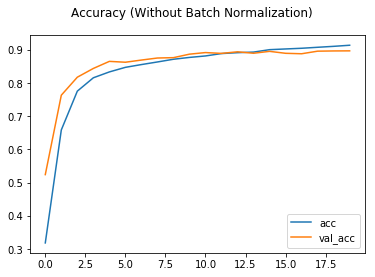

In [39]:
pd.DataFrame(model_hist.history)[['acc','val_acc']].plot()
plt.suptitle("Accuracy (Without Batch Normalization)")
plt.show()

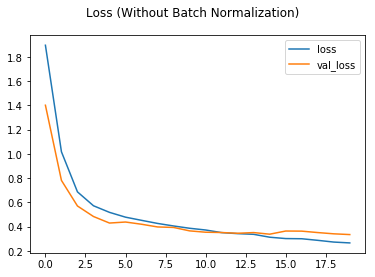

In [40]:
pd.DataFrame(model_hist.history)[['loss','val_loss']].plot()
plt.suptitle("Loss (Without Batch Normalization)")
plt.show()

## Model with Batch Normalization:

In [41]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [42]:
model_bn = Sequential()
model_bn.add(Conv2D(conv_l1,
                    kernel_size=(3,3),
                    input_shape = input_shape,
                    activation="relu",padding='same'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(dropout))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Conv2D(conv_l2, kernel_size=(3,3),
                    activation="relu",padding='same'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(dropout))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Conv2D(conv_l3, kernel_size=(3,3), 
                    activation="relu",padding='same'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(dropout))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
# model_bn.add(Conv2D(conv_l4, kernel_size=(3,3),
#                     activation="relu",padding='same'))
# model_bn.add(BatchNormalization())
# model_bn.add(Dropout(dropout))
# model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Flatten())
model_bn.add(Dense(dense_l1, activation='relu'))
model_bn.add(Dropout(dropout))
model_bn.add(Dense(dense_l2, activation='relu'))
model_bn.add(Dense(num_classes, activation='softmax'))

model_bn.compile("adam", "categorical_crossentropy",
                 metrics=["accuracy"])

In [43]:
model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        27712     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 64)        0         
__________

In [44]:
model_bn_hist = model_bn.fit(X_train,
                       y_train,
                       batch_size=256,
                       epochs=20,
                       verbose=1,
                       validation_split = .1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 19s 292us/step - loss: 1.9703 - acc: 0.3407 - val_loss: 1.4511 - val_acc: 0.5285
Epoch 2/20
65931/65931 [==============================] - 17s 252us/step - loss: 0.8205 - acc: 0.7285 - val_loss: 0.6542 - val_acc: 0.7932
Epoch 3/20
65931/65931 [==============================] - 17s 251us/step - loss: 0.5850 - acc: 0.8130 - val_loss: 0.6590 - val_acc: 0.8067
Epoch 4/20
65931/65931 [==============================] - 17s 253us/step - loss: 0.4988 - acc: 0.8413 - val_loss: 0.4673 - val_acc: 0.8561
Epoch 5/20
65931/65931 [==============================] - 17s 252us/step - loss: 0.4485 - acc: 0.8592 - val_loss: 0.5635 - val_acc: 0.8438
Epoch 6/20
65931/65931 [==============================] - 17s 253us/step - loss: 0.4117 - acc: 0.8697 - val_loss: 0.4837 - val_acc: 0.8492
Epoch 7/20
65931/65931 [==============================] - 17s 253us/step - loss: 0.3828 - acc: 0.8794 - val_loss: 0.5

In [45]:
print("Model with Batch Normalization Test Accuracy: \n")
model_bn.evaluate(X_test, y_test)

Model with Batch Normalization Test Accuracy: 

26032/26032 [==============================] - 5s 177us/step


[0.5182511254915534, 0.8936693300553166]

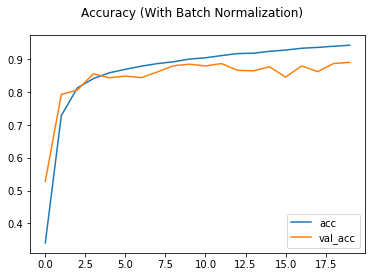

In [46]:
pd.DataFrame(model_bn_hist.history)[['acc','val_acc']].plot()
plt.suptitle("Accuracy (With Batch Normalization)")
plt.show()

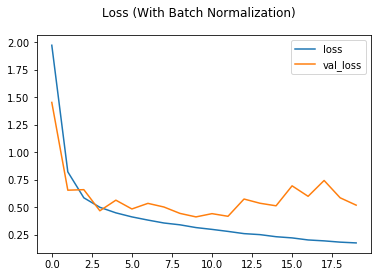

In [47]:
pd.DataFrame(model_bn_hist.history)[['loss','val_loss']].plot()
plt.suptitle("Loss (With Batch Normalization)")
plt.show()

# Task 4 [30 points]

* Load the weights of a pre-trained convolutional neural network included in keras, see
https://keras.io/applications/ , and use it as feature extraction method to train a linear model or
MLP (scikit-learn or keras are fine) on the pets dataset 
( http://www.robots.ox.ac.uk/~vgg/data/pets/ ). <br>
* You should achieve at least 70% accuracy. It’s
recommended you store the extracted features on disk so you don’t have to recompute them
for model selection. <br>
* We will be working with the 37 class classification task.

In [48]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [49]:
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import os
from IPython.display import display
import PIL
from PIL import Image
from PIL.Image import core as _imaging
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

from keras.applications.inception_v3 import preprocess_input
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg

#### Data import

In [50]:
images_dataset_dir = "images"
ground_truth_dir = "annotations"
test_file = open('annotations/test.txt')
test_names_list = test_file.readlines()
train_file = open('annotations/trainval.txt')
train_names_list = train_file.readlines()

test_class_labels = [ name.split()[1] for name in test_names_list]
test_class_names = [ name.split()[0] for name in test_names_list]
test_name_label_dict = dict(zip(test_class_names,test_class_labels))

train_class_labels = [ name.split()[1] for name in train_names_list]
train_class_names = [ name.split()[0] for name in train_names_list]
train_name_label_dict = dict(zip(train_class_names,train_class_labels))

#### Data Preprocessing

* Reading in images into a numpy array
* Separating images to test and train sets based on image names given in trainval.txt file and test.txt file

In [51]:
test_class_labels = np.array(test_class_labels).astype(int)
num_classes = np.unique(test_class_labels).shape[0]

img_rows, img_cols = 150,150

train_labels = []
train_data = []
test_data = []
test_labels =[]

for imageName in sorted(os.listdir("images")):
    if (".mat" in imageName):
        print(".mat error for file: ",imageName)
        continue
    img = load_img("images/"+str(imageName),False,
                   target_size=(img_rows,img_cols,3),
                   interpolation='nearest')
    x = img_to_array(img)
    breed_name = imageName[:-4]
    
    if breed_name in train_class_names:
        train_data.append(x)
        train_labels.append(train_name_label_dict[breed_name])
        
    elif breed_name in test_class_names:
        test_data.append(x)
        test_labels.append(test_name_label_dict[breed_name])
    else:
        print("Breed not found. Invalid image:", imageName, breed_name)

.mat error for file:  Abyssinian_100.mat
.mat error for file:  Abyssinian_101.mat
.mat error for file:  Abyssinian_102.mat
Breed not found. Invalid image: Abyssinian_34.jpg Abyssinian_34
Breed not found. Invalid image: Abyssinian_82.jpg Abyssinian_82
Breed not found. Invalid image: Bombay_11.jpg Bombay_11
Breed not found. Invalid image: Bombay_189.jpg Bombay_189
Breed not found. Invalid image: Bombay_190.jpg Bombay_190
Breed not found. Invalid image: Bombay_192.jpg Bombay_192
Breed not found. Invalid image: Bombay_203.jpg Bombay_203
Breed not found. Invalid image: Bombay_206.jpg Bombay_206
Breed not found. Invalid image: Bombay_209.jpg Bombay_209
Breed not found. Invalid image: Bombay_210.jpg Bombay_210
Breed not found. Invalid image: Bombay_217.jpg Bombay_217
Breed not found. Invalid image: Bombay_22.jpg Bombay_22
Breed not found. Invalid image: Bombay_220.jpg Bombay_220
Breed not found. Invalid image: Bombay_32.jpg Bombay_32
Breed not found. Invalid image: Bombay_69.jpg Bombay_69
Bre

In [52]:
train_labels_np = np.array(train_labels)
test_labels_np = np.array(test_labels)
train_data_np = np.array(train_data)
test_data_np = np.array(test_data)

#### Model import

In [53]:
model_inc = applications.inception_v3.InceptionV3(include_top=False,
                                                  weights='imagenet',
                                                  input_tensor=None,
                                                  input_shape=(150,150,3),
                                                  pooling=None, classes=1000)

In [54]:
train_inc = preprocess_input(train_data_np)
test_inc = preprocess_input(test_data_np)

feat_train_inc = model_inc.predict(train_inc)
X_train = feat_train_inc.reshape(feat_train_inc.shape[0], -1)
y_train = np.array(train_labels_np,copy=True)

feat_test_inc = model_inc.predict(test_inc)
X_test = feat_test_inc.reshape(feat_test_inc.shape[0], -1)
y_test = np.array(test_labels_np,copy = True)

##### Saving the features data:

In [55]:
import h5py

with h5py.File('features-inc3_train.h5', 'w') as hf:
    hf.create_dataset("feat_train_inc",  data=feat_train_inc)

with h5py.File('features-inc3_test.h5', 'w') as hf:
    hf.create_dataset("feat_test_inc",  data=feat_test_inc)

In [56]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train[y_train == 37] = 0
y_test[y_test == 37] = 0

### Running a classifier on the features data:

##### LinearSVC Classifier:

In [58]:
from sklearn.svm import LinearSVC
logit = LinearSVC(verbose=1).fit(X_train, y_train)
print("The train score is {}".format(logit.score(X_train, y_train)))
print("The test score is {}".format(logit.score(X_test, y_test)))

[LibLinear]The train score is 1.0
The test score is 0.7972199509403107
